### Principal components analysis (Dimensionality Reduction) with application


In [383]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.plotting import plot_pca_correlation_graph #for correlation cercle

In [384]:
class PCA:
    """Static variables."""
    matrix = np.array(data.values,dtype='f')
    dim = matrix.shape
    objects = data.index
    variables = data.columns
    def __init__(self,data, normed=True):
        """Initialize variable."""
        self.data = data
        self.normed = normed
        self.cov_matrix = None
        self.axis_normed = None
        self.inertia = None
        self.new_cordonates = None
    def summary(self):
        """Descriptive statistic."""
        desc = self.data.describe()
        std= desc.loc['std']
        plt = std.plot.hist(column=['std'])
        
        print(plt)
        print(desc)

    def get_corr_matrix(self):
        """correlation matrix if normed True else covariance."""
        mean = np.mean(PCA.matrix,0)
        c_matrix = PCA.matrix - mean
        row,col = PCA.dim
        if self.normed == True:
            """correlation matrix(matrixcov == matrixcorr)"""
            std = np.std(PCA.matrix,0)
            normed_matrix = c_matrix / std
            self.cov_matrix = pd.DataFrame((1/row)*np.matmul(normed_matrix.T,normed_matrix))
        else:
            """covariance matrix"""
            self.cov_matrix = pd.DataFrame((1/row)*np.matmul(c_matrix.T,c_matrix))
   
    def p_axis(self):
        """return principal axis & their associated inertia (and the normed vector)."""
        lam, axis = np.linalg.eig(self.cov_matrix.values)
        
        #check if the norm == 1
        for i in axis:
            if np.linalg.norm(i) < 0.95 and np.linalg.norm(i) > 1.05:
                axis = axis / np.linalg.norm(i)
        
        #contribution
        ctr_axis = pd.Series((lam*100) / np.sum(lam))
        
        self.axis_normed = pd.DataFrame(axis) 
        self.inertia = pd.DataFrame(lam)
        return f"The quantity of information on the axis {ctr_axis}"
        
        
    def p_components(self):
        """return principal components + element of interpretation."""
        new_comp = np.matmul(PCA.matrix,self.axis_normed.values) 
        mean = np.mean(PCA.matrix,0)
        c_matrix = PCA.matrix - mean
        if self.normed == True:
            std = np.std(PCA.matrix,0)
            normed_matrix = c_matrix / std
            self.new_cordonates =  np.matmul(normed_matrix,self.axis_normed.values[:,0:2]) 
        else:
            self.new_cordonates = np.matmul(c_matrix,self.axis_normed.values[:,0:2]) 
    
    def cercle_corr(self):
        """cercle correlation representation"""
        row,col = PCA.dim

        c = np.sqrt(self.inertia.values.T) * self.axis_normed.values
        figure, correlation_matrix = plot_pca_correlation_graph(c, 
                                                        PCA.variables,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=10)
        print(figure)
    
    def scatter_plt(self):
        """you can add parametre to customize the graphe"""
        x,y = self.new_cordonates[:,0],self.new_cordonates[:,1]
        graph =  plt.scatter(x, y, color = '#88c999')
        print(graph)
    

In [385]:
#should set header == 0 & precise index_col to make it easy
data = pd.read_excel('tp_data.xlsx', sheet_name="4",header=0,index_col='Modèle')
test = PCA(data,True)
test.data

,Cylindrée,Puissance,Vitesse,Poids,Longueur,Largeur
Modèle,,,,,,
HONDA civic,1396,90,174,850,369,166
RENAULT 19,1721,92,180,965,415,169
FIAT Tipo,1580,83,170,970,395,170
PEUGEOT 405,1769,90,180,1080,440,169
RENAULT 21,2068,88,180,1135,446,170
CITROEN BX,1769,90,182,1060,424,168
BMW 530 i,2986,188,226,1510,472,175
ROVER 827 i,2675,177,22,1365,469,175
RENAULT 25,2548,182,226,1350,471,180


In [386]:
test.dim

(24, 6)

In [387]:
test.matrix

array([[1396.,   90.,  174.,  850.,  369.,  166.],
       [1721.,   92.,  180.,  965.,  415.,  169.],
       [1580.,   83.,  170.,  970.,  395.,  170.],
       [1769.,   90.,  180., 1080.,  440.,  169.],
       [2068.,   88.,  180., 1135.,  446.,  170.],
       [1769.,   90.,  182., 1060.,  424.,  168.],
       [2986.,  188.,  226., 1510.,  472.,  175.],
       [2675.,  177.,   22., 1365.,  469.,  175.],
       [2548.,  182.,  226., 1350.,  471.,  180.],
       [1998.,  122.,  190., 1255.,  473.,  177.],
       [1905.,  125.,  194., 1120.,  439.,  171.],
       [1993.,  115.,  185., 1190.,  451.,  172.],
       [2494.,  171.,  208., 1300.,  432.,  164.],
       [1994.,  160.,  214., 1220.,  439.,  169.],
       [2933.,  150.,  200., 1345.,  466.,  176.],
       [1995.,  120.,  177., 1265.,  436.,  177.],
       [1952.,   87.,  144., 1430.,  436.,  169.],
       [2019.,  112.,  149., 1320.,  457.,  184.],
       [1117.,   50.,  135.,  810.,  371.,  162.],
       [1116.,   58.,  145.,  7

AxesSubplot(0.125,0.11;0.775x0.77)
         Cylindrée   Puissance     Vitesse        Poids    Longueur  \
count    24.000000   24.000000   24.000000    24.000000   24.000000   
mean   1902.375000  113.666667  174.750000  1110.833333  421.583333   
std     526.723243   38.784428   40.319647   230.291246   41.340491   
min    1116.000000   50.000000   22.000000   730.000000  350.000000   
25%    1550.250000   89.500000  167.250000   913.750000  370.750000   
50%    1928.500000  101.500000  180.500000  1127.500000  436.000000   
75%    2031.250000  131.250000  191.000000  1305.000000  452.500000   
max    2986.000000  188.000000  226.000000  1510.000000  473.000000   

          Largeur  
count   24.000000  
mean   168.833333  
std      7.653738  
min    155.000000  
25%    163.500000  
50%    169.000000  
75%    175.000000  
max    184.000000  


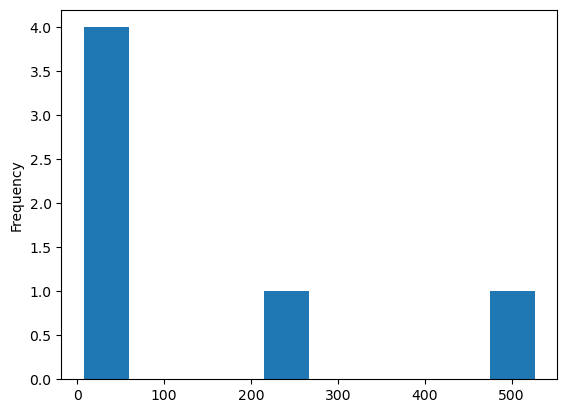

In [388]:
test.summary()

In [389]:
test.get_corr_matrix()
test.cov_matrix


,0,1,2,3,4,5
0,1.000000,0.863233,0.124494,0.900223,0.859783,0.695933
1,0.863233,1.000000,0.206913,0.746079,0.688515,0.552280
2,0.124494,0.206913,1.000000,0.069301,0.085283,0.053398
3,0.900223,0.746079,0.069301,1.000000,0.917112,0.790915
4,0.859783,0.688515,0.085283,0.917112,1.000000,0.863814
5,0.695933,0.552280,0.053398,0.790915,0.863814,1.000000


In [390]:
test.p_axis()

'The quantity of information on the axis 0    69.695564\n1    16.887888\n2     8.321542\n3     2.890590\n4     1.054548\n5     1.149870\ndtype: float32'

In [391]:
test.axis_normed

,0,1,2,3,4,5
0,0.464069,0.011621,-0.310524,-0.247729,0.692309,-0.383950
1,0.413296,0.159648,-0.638003,0.534567,-0.315467,0.106627
2,0.074669,0.968359,0.226810,-0.067368,0.020797,0.017091
3,0.467425,-0.088000,0.028570,-0.487248,-0.069355,0.728514
4,0.464747,-0.092908,0.262862,-0.254764,-0.585981,-0.545897
5,0.416864,-0.142418,0.612512,0.588230,0.269392,0.110379


In [392]:
test.inertia

,0
0,4.181734
1,1.013273
2,0.499293
3,0.173435
4,0.063273
5,0.068992


In [393]:
test.p_components()
test.new_cordonates

array([[-2.0170698 ,  0.14706074],
       [-0.7578503 ,  0.10247996],
       [-1.165307  , -0.15892227],
       [-0.21089111, -0.0071307 ],
       [ 0.27501187, -0.06305285],
       [-0.48795128,  0.10548288],
       [ 3.6310465 ,  1.2055566 ],
       [ 2.5103986 , -3.789072  ],
       [ 3.1064968 ,  1.140168  ],
       [ 1.5493562 ,  0.08178836],
       [ 0.50170755,  0.43523973],
       [ 0.7936045 ,  0.10049168],
       [ 1.4623823 ,  1.0642695 ],
       [ 1.0966951 ,  1.0740675 ],
       [ 2.7651443 ,  0.4658788 ],
       [ 1.0961285 , -0.16458729],
       [ 0.53279203, -1.0262681 ],
       [ 1.7223272 , -1.08736   ],
       [-3.0598798 , -0.8971766 ],
       [-3.4868236 , -0.4573891 ],
       [-2.471385  , -0.08277184],
       [-2.5215325 ,  0.7537693 ],
       [-2.0280576 ,  0.44184697],
       [-2.836341  ,  0.61562943]], dtype=float32)

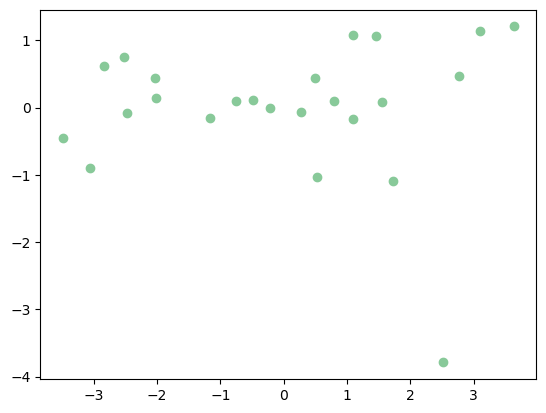

In [394]:
test.scatter_plt()

Figure(1000x1000)


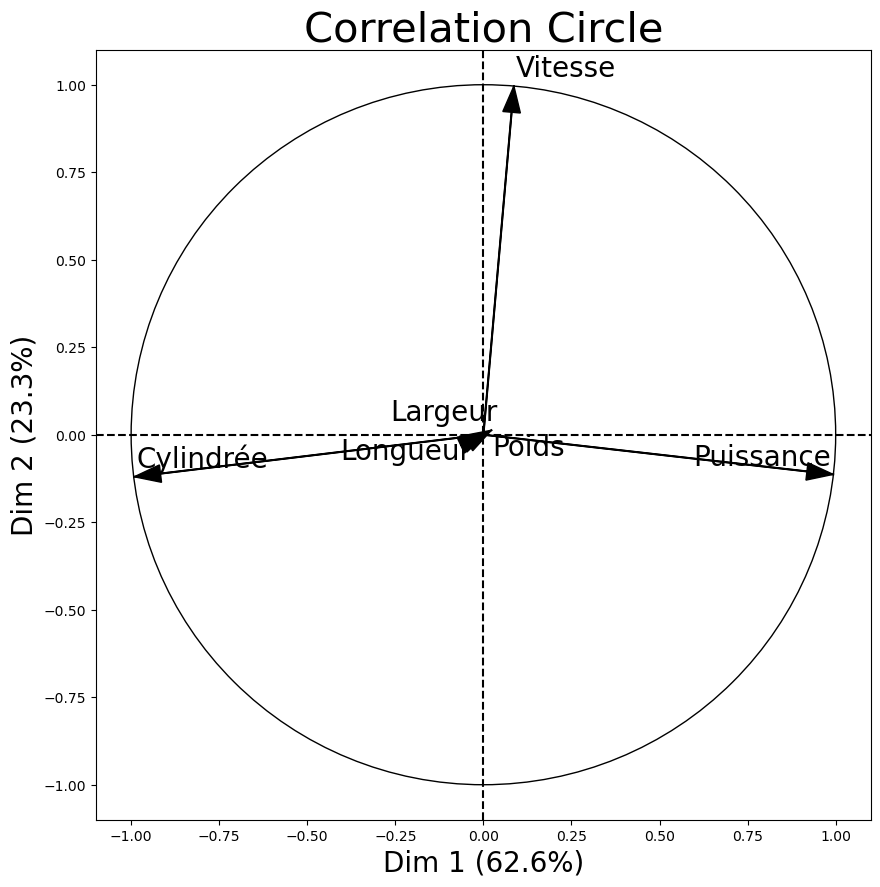

In [395]:
test.cercle_corr()